Gerekli kütüphanelerin ve verisetinin yüklenmesi

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
df = pd.read_csv('https://raw.githubusercontent.com/tarikkranda/pi_intern_question/main/dataset.csv')


**Görselleştirme**

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

**Feature'ların(özniteliklerin) birbirleriyle ilişkili olup olmadığını görmek için korelasyonlarına bakabiliriz.**

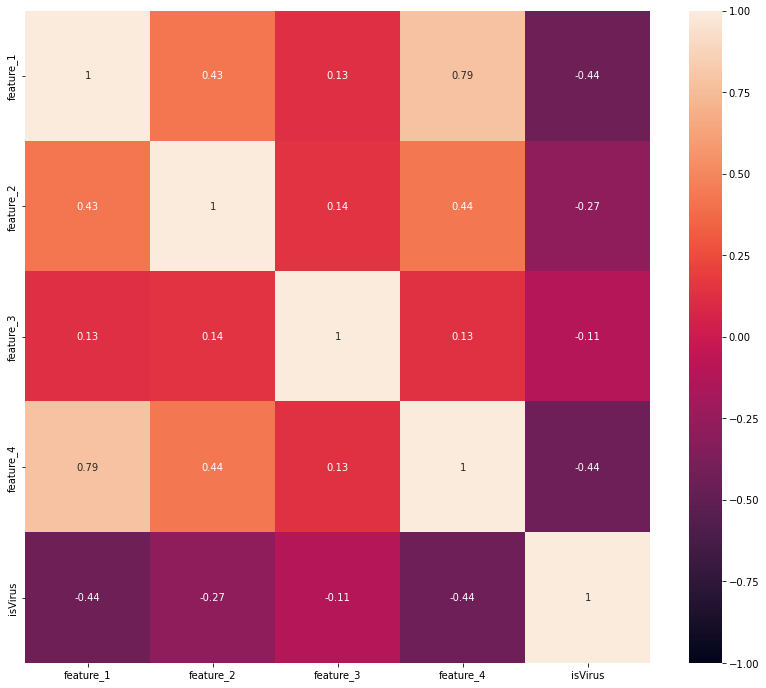

In [4]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),annot=True, vmin=-1.0, vmax=1.0)
plt.show()

Verisetimizdeki isVirus sütünunu tahmin etmeye çalışacağımız için veriyi iki parçaya bölüyorum.

In [16]:
y = df['isVirus']
X = df.drop(['isVirus'],axis=1)


Özniteliklerdeki null değerleri, özniteliklerinin ortalamalarıyla değiştiriyorum. 

In [19]:
for i in X.columns:
  X[i].fillna(value=X[i].mean(),inplace=True)

In [20]:
X.isnull().sum()

feature_1    0
feature_2    0
feature_3    0
feature_4    0
dtype: int64

Modellerimizin daha iyi çalışması için eğitim yapacağımız verimizi belli bir ölçekte scale ediyorum. 
Standart Scaler temel olarak ortamalayı 0, standart sapmayı 1 kabul ederek verileri bu ölçüde scale etmeye yarar.

In [21]:
scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [22]:
X

,feature_1,feature_2,feature_3,feature_4
0,-6.221065e-01,-0.950477,-9.552960e-02,0.537161
1,4.183114e-01,-0.356250,5.040958e-01,-0.013791
2,-2.456457e-01,0.077280,4.669139e-01,-1.002083
3,-1.443179e+00,-1.013817,-8.080760e-01,-0.638247
4,3.954613e-01,2.239651,1.364108e-02,0.615444
...,...,...,...,...
1994,1.020046e+00,0.219878,8.627509e-01,0.802862
1995,-6.591245e-17,1.129511,2.166358e-15,0.982386
1996,1.926289e+00,0.116069,-3.319523e-01,2.002821
1997,1.569058e+00,1.384766,8.012387e-01,1.414089


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)


Problemimiz bir sınıflandırma problemi olduğu için logistic regression, support vector machine ve multilayer perceptron classifier metodlarını kullandım.

In [24]:
log_model = LogisticRegression()
svm_model = SVC(C=1.0, kernel='rbf')
nn_model = MLPClassifier(hidden_layer_sizes=(128, 128))

In [25]:
log_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
nn_model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(hidden_layer_sizes=(128, 128))

In [26]:
print(f"---Logistic Regression: {log_model.score(X_test, y_test)}")
print(f"Support Vector Machine: {svm_model.score(X_test, y_test)}")
print(f"--------Neural Network: {nn_model.score(X_test, y_test)}")


---Logistic Regression: 0.64
Support Vector Machine: 0.83
--------Neural Network: 0.8975


0.8975 doğrulukla tahmin eden Neural Network Modelinin confusion matrixi aşağıda görülmekte

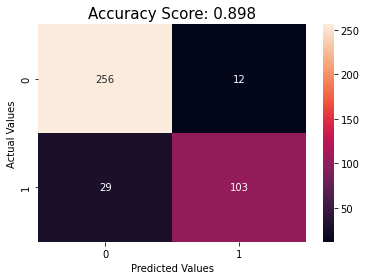

In [33]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix as cm
predictions = nn_model.predict(X_test)
score = round(accuracy_score(y_test, predictions), 3)
cm1 = cm(y_test, predictions)
sns.heatmap(cm1, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 15)
plt.show()

Hangi özniteliklerin sonucu en çok etkilediğine bakmak için bir de Random Forest Classifier metoduyla tahmin yapalım.

In [37]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
rf = RandomForestClassifier(n_estimators=100, max_depth = 12, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=12, random_state=42)

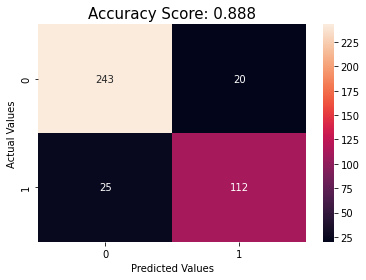

In [38]:
predictions = rf.predict(X_test)
score = round(accuracy_score(y_test, predictions), 3)
cm1 = cm(y_test, predictions)
sns.heatmap(cm1, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 15)
plt.show()

              precision    recall  f1-score   support

       False       0.91      0.92      0.92       263
        True       0.85      0.82      0.83       137

    accuracy                           0.89       400
   macro avg       0.88      0.87      0.87       400
weighted avg       0.89      0.89      0.89       400



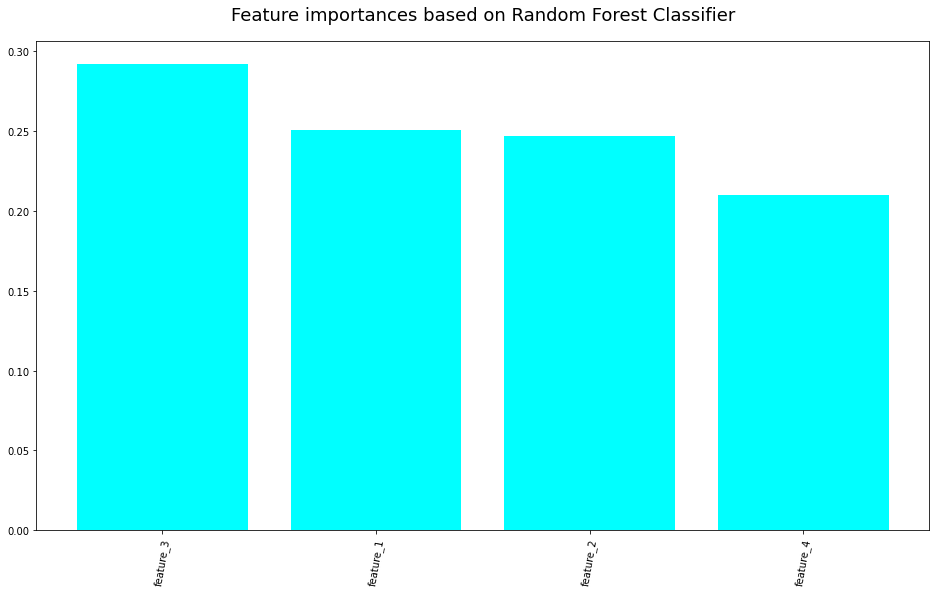

In [43]:
from sklearn import ensemble
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))
plt.figure(figsize=(16, 9))

ranking = rf.feature_importances_
features = np.argsort(ranking)[::-1][:4]
columns = X.columns

plt.title("Feature importances based on Random Forest Classifier", y = 1.03, size = 18)
plt.bar(range(len(features)), ranking[features], color="aqua", align="center")
plt.xticks(range(len(features)), columns[features], rotation=80)
plt.show()

Random Forest Classfier metoduna göre kararımızı etkileyen en önemli özniteligin öznitelik3 olduğu görülmektedir.

Zamanım kısıtlıydı, veriyi nasıl görselleştirebilirim diye düşündüm fakat korelasyondan başka bir şey aklıma gelmedi. Daha sonrasında da sınıflandırma metodlarını kullanarak bir şeyler yaptım. İyi çalışmalar dilerim. Mert Kaplan